In [13]:
# -----------------------------------------------------------
# 1) Import des bibliothèques nécessaires
# -----------------------------------------------------------
from pymatgen.ext.matproj import MPRester  
from pymatgen.io.cif import CifWriter  
from IPython.display import FileLink  
from pymatgen.electronic_structure.plotter import BSPlotter  
import numpy as np  
import matplotlib.pyplot as plt  
from pymatgen.electronic_structure.core import Spin
# -----------------------------------------------------------
# 2) Récupération des données depuis Materials Project
# -----------------------------------------------------------
with MPRester("n58KMF7umZMAJXouXDJc0vORWlcEfEsD") as m:
    # Récupération de la structure
    structure = m.get_structure_by_material_id("mp-15794")
    # Récupération de la structure de bandes
    bandstructure = m.get_bandstructure_by_material_id("mp-15794", line_mode=True)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Bande interdite

Gap (band_gap) = 1.5238999999999998 eV
Direct ? False
Transition = (0.031,0.000,-0.031)-F


<Figure size 640x480 with 0 Axes>

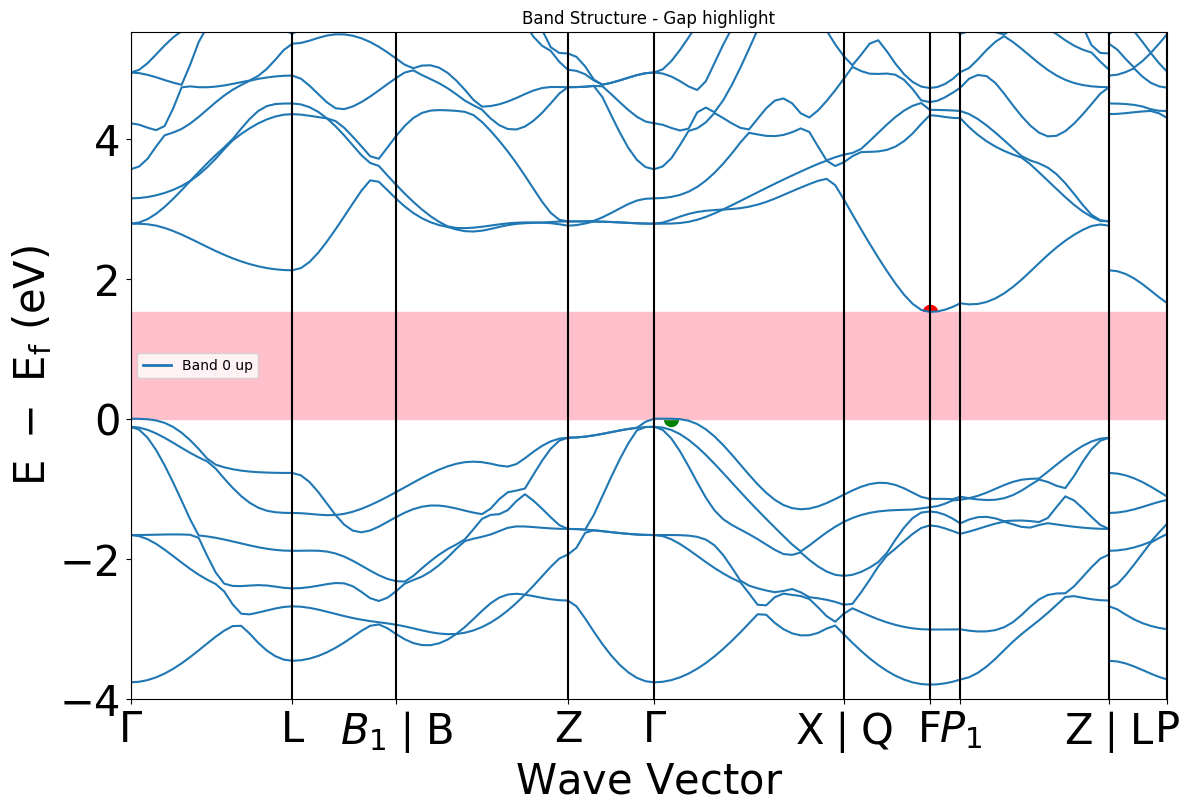

In [14]:
# -----------------------------------------------------------
# 3) Tracé initial et vérification du gap
# -----------------------------------------------------------
plot_bs = BSPlotter(bandstructure)
data = plot_bs.bs_plot_data()

band_gap = bandstructure.get_band_gap()
energy_gap = band_gap.get('energy', 0)

print("Gap (band_gap) =", energy_gap, "eV")
print("Direct ?", band_gap.get('direct', None))
print("Transition =", band_gap.get('transition', None))

# On trace rapidement la structure de bandes
plt.figure()
plot_bs.get_plot(vbm_cbm_marker=True)

# Surlignage du gap
distances_full = data.get('ticks').get('distance')
if distances_full:
    plt.fill_between(
        np.linspace(distances_full[0], distances_full[-1], 2),
        0, 
        energy_gap,
        color="pink"
    )

plt.title(f"Band Structure - Gap highlight")
plt.show()

1. Bande interdite (Band Gap)
La valeur du gap énergétique est de 1.5239 eV, ce qui est typique d’un semi-conducteur.
2. Nature du Gap : Indirect
L’information "Direct ? False" signifie que la transition entre la bande de valence et la bande de conduction n’a pas lieu au même vecteur d’onde (k-point) dans l’espace réciproque.
3. Transition électronique
Celle-ci s'opère selon le chemin décrit dans 'transition' : (0.031,0.000,-0.031)-F

# Dispertion

In [15]:
# -----------------------------------------------------------
# 4) Première bande de conduction
# -----------------------------------------------------------

cbm = bandstructure.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction :',E_cbm,'eV')
print(cbm.get('band_index'))
print('La bande 13 est la première bande de conduction.')
# -----------------------------------------------------------
# 5) Dernière bande de valence
# -----------------------------------------------------------

vbm = bandstructure.get_vbm()
data = BSPlotter(bandstructure).bs_plot_data()
E_0 = data.get('zero_energy')
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

print('Energie du maximum de la bande de valence : {} eV'.format(E_vbm))
print(vbm.get('band_index'))
print('La bande 12 la dernière bande de valence.')


Energie du minimum de la bande de conduction : 3.762 eV
defaultdict(<class 'list'>, {<Spin.up: 1>: [13]})
La bande 13 est la première bande de conduction.
Energie du maximum de la bande de valence : 2.2381 eV
defaultdict(<class 'list'>, {<Spin.up: 1>: [12]})
La bande 12 la dernière bande de valence.


Le CBM (Conduction Band Minimum)
- Le minimum de la bande de conduction (CBM) est le niveau d’énergie le plus bas de la première bande de conduction.

- Dans l’exemple, le code affiche une valeur d’environ 3,762 eV, ainsi que l’indice de bande (la bande 13).

- Cela signifie que la première bande de conduction commence à 3,762 eV 

Le VBM (Valence Band Maximum)
- Le maximum de la bande de valence (VBM) représente le niveau d’énergie le plus élevé encore occupé par les électrons dans la bande de valence.

- Le code récupère ce VBM, son énergie et le point k (coordonnée dans l’espace réciproque) où il se situe.

- Le VBM se trouve à une énergie d’environ 2,2381 eV.

- L’indice de bande indiqué (ici la bande 12) correspond à la numérotation interne . Cette numérotation suit l’ordre croissant des énergies.

<function matplotlib.pyplot.show(close=None, block=None)>

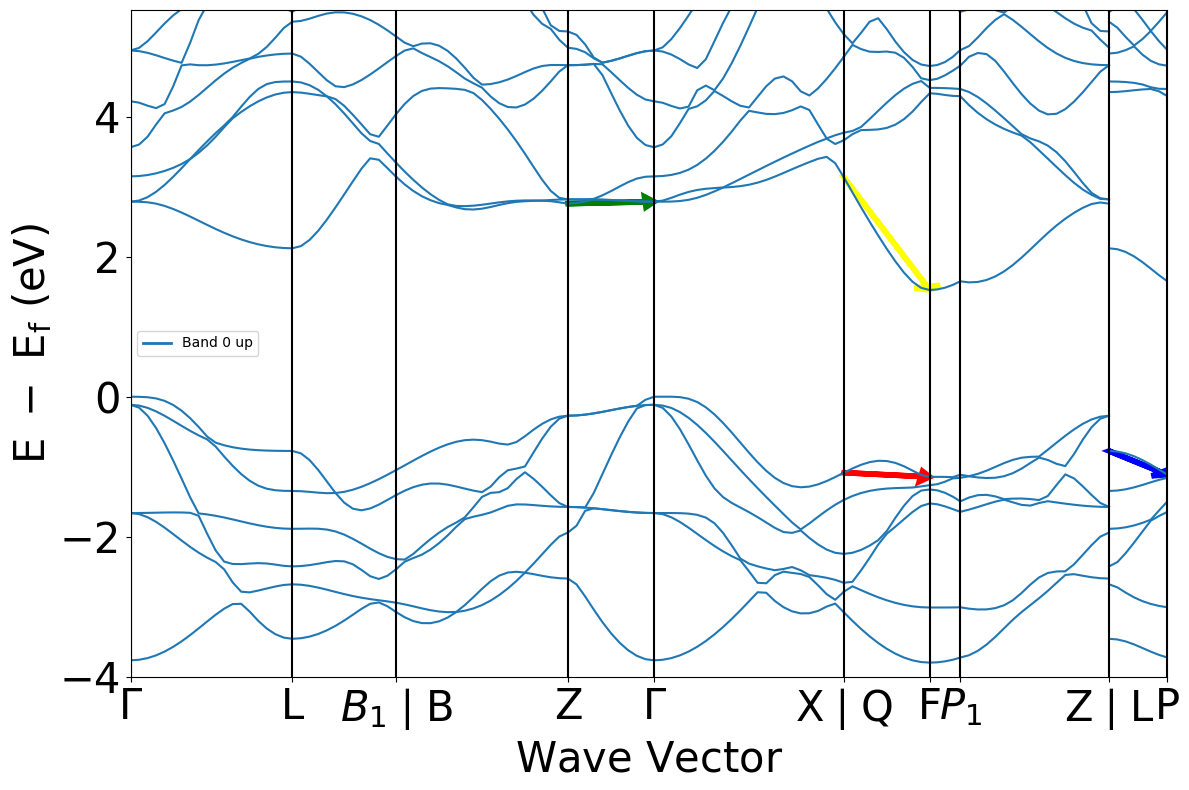

In [16]:
plotter = BSPlotter(bandstructure)
plot = plotter.get_plot()

data = plotter.bs_plot_data()
energies = data.get('energy').get('1')

# Suppression des doublons dans les abscisses k
absc_dupl = data.get('ticks').get('distance')
absc = list(dict.fromkeys(absc_dupl)) 
absc = np.array(absc)

deltaX = absc[1:] - absc[0:-1]  # Distance entre k-points

# Calcul des pentes (dispersion) pour valence et conduction
slopeVal = np.zeros_like(deltaX)
slopeCond = np.zeros_like(deltaX)
for i in range(len(deltaX)):
    slopeVal[i] = (energies[i][12][-1] - energies[i][12][0]) / deltaX[i]
    slopeCond[i] = (energies[i][13][-1] - energies[i][13][0]) / deltaX[i]
    
# Détection des valeurs minimales et maximales
minVal, maxVal = np.min(np.abs(slopeVal)), np.max(np.abs(slopeVal))
minCond, maxCond = np.min(np.abs(slopeCond)), np.max(np.abs(slopeCond))


minIndexVal = np.argmin(np.abs(slopeVal))
maxIndexVal = np.argmax(np.abs(slopeVal))
minIndexCond = np.argmin(np.abs(slopeCond))
maxIndexCond = np.argmax(np.abs(slopeCond))

# Rajout des flèches montrant la dispersion 
plt.arrow(absc[minIndexVal], energies[minIndexVal][12][0], 
          absc[minIndexVal + 1] - absc[minIndexVal], 
          energies[minIndexVal][12][-1] - energies[minIndexVal][12][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='r', length_includes_head=True)

plt.arrow(absc[maxIndexVal], energies[maxIndexVal][12][0], 
          absc[maxIndexVal + 1] - absc[maxIndexVal], 
          energies[maxIndexVal][12][-1] - energies[maxIndexVal][12][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='b', length_includes_head=True)

plt.arrow(absc[minIndexCond], energies[minIndexCond][13][0], 
          absc[minIndexCond + 1] - absc[minIndexCond], 
          energies[minIndexCond][13][-1] - energies[minIndexCond][13][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='g', length_includes_head=True)

plt.arrow(absc[maxIndexCond], energies[maxIndexCond][13][0], 
          absc[maxIndexCond + 1] - absc[maxIndexCond], 
          energies[maxIndexCond][13][-1] - energies[maxIndexCond][13][0], 
          head_width=0.15, head_length=0.05, linewidth=4, color='yellow', length_includes_head=True)


plt.show

In [17]:
print(f"L’indice avec la dispersion **minimale** dans la dernière bande de valence est {minIndexVal} → valeur : {slopeVal[minIndexVal]:.4f} eV/Å")
print(f"L’indice avec la dispersion **maximale** dans la dernière bande de valence est {maxIndexVal} → valeur : {slopeVal[maxIndexVal]:.4f} eV/Å")

print(f"L’indice avec la dispersion **minimale** dans la première bande de conduction est {minIndexCond} → valeur : {slopeCond[minIndexCond]:.4f} eV/Å")
print(f"L’indice avec la dispersion **maximale** dans la première bande de conduction est {maxIndexCond} → valeur : {slopeCond[maxIndexCond]:.4f} eV/Å")


L’indice avec la dispersion **minimale** dans la dernière bande de valence est 5 → valeur : -0.1248 eV/Å
L’indice avec la dispersion **maximale** dans la dernière bande de valence est 8 → valeur : -1.0409 eV/Å
L’indice avec la dispersion **minimale** dans la première bande de conduction est 3 → valeur : 0.0585 eV/Å
L’indice avec la dispersion **maximale** dans la première bande de conduction est 5 → valeur : -3.3474 eV/Å


# Masse effective 

Pour déterminer la masse effective à partir d’une dispersion parabolique en unités usuelles (énergie en eV, vecteur d’onde en Å⁻¹ ou en m⁻¹, etc.), il faut :

---

### 1. **Modéliser la bande près de l'extrémum**

On suppose qu’autour du point \( x_{\text{ext}} \) (maximum de la bande de valence ou minimum de la bande de conduction) l’énergie suit la forme :

$$
E(x) = \alpha (x - x_{\text{ext}})^2
$$

---

### 2. **Relier la dérivée seconde à \( \alpha \)**

La dérivée seconde de \( E \) par rapport à \( x \) est simplement :

$$
\frac{d^2 E}{dx^2} = 2 \alpha
$$

---

### 3. **Utiliser la formule de la masse effective**

Dans le cas isotrope, la masse effective (en notation 1D) se définit par :

$$
m^* = \hbar^2 \left( \frac{d^2 E}{dx^2} \right)^{-1}
$$

Avec la parabole précédente, cela donne :

$$
m^* = \frac{\hbar^2}{2 \alpha}
$$


In [18]:
# -----------------------------------------------------------
# Masse effective par interpolation parabolique
# -----------------------------------------------------------

hbar = 6.62607015e-34 / (2*np.pi)   # J·s
eV   = 1.602176634e-19             # J/eV
A    = 1e-10                       # m/Å
d = data.get('distances')
# 'd' = data["distances"] (liste de segments de distance k)
# 'absc' = liste de distances uniques (déjà extraite)
# 'energies' = data["energy"]["1"], indexées par segment, bande, etc.
# 'plotter' = BSPlotter(bandstructure)

# Domaine de tracé pour l'interpolation
interpdom = np.linspace(d[0][0], d[8][-1], 500)

# -----------------------------------------------------------
# 1) Bande de valence : calcul de la masse effective
# -----------------------------------------------------------
# xVal et yVal : 3 points entourant le sommet (VBM) pour faire une parabole
xVal = [
    2*absc[4] - d[4][1],  # un point symétrique par rapport à absc[4]
    absc[4],              # point central
    d[4][1]               # point à droite
]
yVal = [
    energies[4][12][1],   # même valeur qu'en (4,12,1)
    energies[4][12][0],   # point central
    energies[4][12][1]    # symétrique
]

# Ajustement parabolique
interpVal = np.polyfit(xVal, yVal, 2)  

# α ~ (ΔE) / (Δk^2)
# Ici, alphaVal est déterminé à partir d'une différence d'énergie et de k
alphaVal = (energies[4][12][1]) * eV * A**2 / ((d[4][1] - absc[4])**2)

# Masse effective (valence)
# m* = (ħ² / 2) * (1 / alphaVal) si la parabole est E(k)=alphaVal·(k-k0)²/2 (selon la convention prise)
massVal = (hbar**2) * 0.5 * (1/alphaVal)

print("Masse effective au sommet de la bande de valence :", massVal, "kg.\n")

# -----------------------------------------------------------
# 2) Bande de conduction : calcul de la masse effective
# -----------------------------------------------------------
xCond = [
    2*absc[6] - d[6][1],  # symétrique par rapport à absc[6]
    absc[6],
    d[6][1]
]
yCond = [
    energies[6][13][1],   # point de conduction "symétrique"
    energies[6][13][0],   # point central
    energies[6][13][1]    # symétrique
]

interpCond = np.polyfit(xCond, yCond, 2)

alphaCond = (
    (energies[6][13][1] - energies[6][13][0]) * eV * A**2 
    / ((d[6][1] - absc[6])**2)
)

massCond = (hbar**2) * 0.5 * (1/alphaCond)
print("Masse effective au minimum de la bande de conduction :", massCond, "kg.\n")

Masse effective au sommet de la bande de valence : -8.087497787931345e-29 kg.

Masse effective au minimum de la bande de conduction : 7.549014363268158e-31 kg.

